In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, f1_score
from sklearn.preprocessing import LabelEncoder
import plotly.figure_factory as ff
import joblib

from module import MlfcsTrainer
import metrics
mypalette = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#7f7f7f','#bcbd22','#17becf']
palette2 = ['#719b78','#6a73a4','#bc8977']
palette3 = ['#ffffff','#bc8977','#719b78','#6a73a4']

Initializing module with the trained dataset

In [2]:
Module = joblib.load('../dat/model_trained.pk')

You can choose the one you've trained with Trainer.ipynb

In [ ]:
#Module = joblib.load('../dat/new_model_trained.pk')

In [32]:
#Compute your test
#data_test = pd.read_pickle('../data/test_set_git.pk')
#idx = (data_test['omega_x']==250)&(data_test['omega']==500)
#data_test = data_test.loc[idx,:].sample(n=10000)
#res = Module.test(data_test)
#res.to_pickle('../dat/result_test.pk')

#Load a pre computed test
res = pd.read_pickle('../dat/result_test1906.pk')

Figure 2 : MAE as function of observation time

In [33]:
Data = res

#Parameters taken for the analysis
omegas = [500,600,700]
omegas_x = [200,225,250,275,300]
time_list = [0.25, 0.5, 0.75, 1.0, 1.25 , 1.50, 2.0]
models = ['MB','CTRW','FBM']

fig = metrics.return_mae(Data, omegas,omegas_x,time_list,models)

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_64115/2758868026.py:6: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  maeD = sns.relplot(


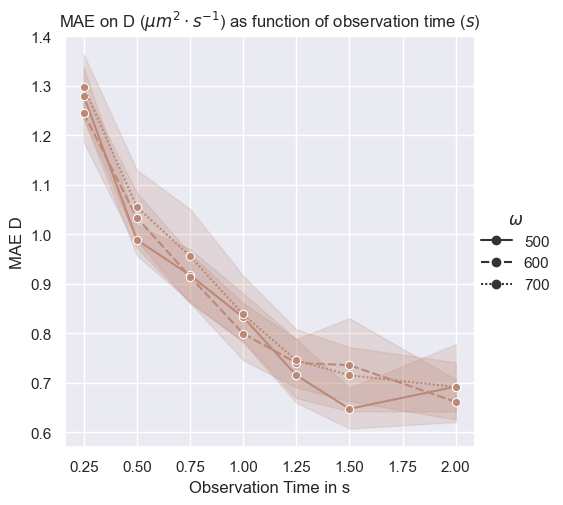

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_64115/2758868026.py:19: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  maealpha = sns.relplot(


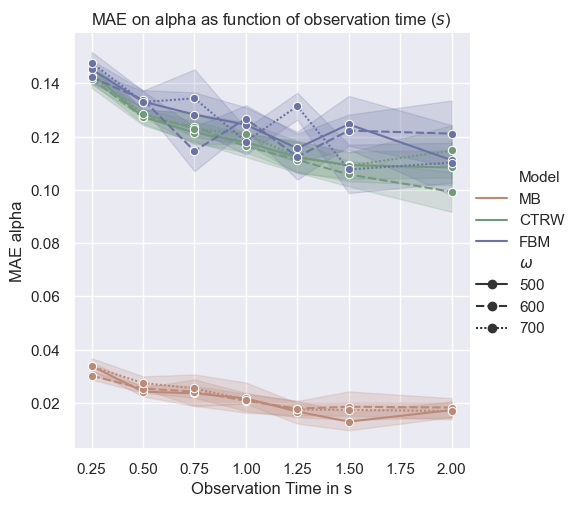

In [34]:
sns.set_theme()

#MAE D
# D follows a uniform law on [0,10]
sns.set_palette(palette3[1:])
maeD = sns.relplot(
    data=fig.loc[fig['Model']=='MB'],
    x = 'Time window' , y = 'MAE D', style = '$\omega$',
    markers = "o", kind = "line"
)
maeD.set(title = 'MAE on D ($\mu m^2 \cdot s^{-1}$) as function of observation time ($s$)')
maeD.set_xlabels('Observation Time in s')
plt.show()
maeD.savefig('../fig/mae_D.pdf',dpi=300)

#MAE alpha
#alpha follows a uniform law on [0,1] when fBm, CTRW
sns.set_palette(palette3[1:])
maealpha = sns.relplot(
    data=fig,
    x = 'Time window' , y = 'MAE alpha',style = '$\omega$',hue ='Model',
    markers = "o", kind = "line"
)
maealpha.set(title = 'MAE on alpha as function of observation time ($s$)')
maealpha.set_xlabels('Observation Time in s')

plt.show()
maealpha.savefig('../fig/mae_alpha.pdf',dpi=300)

In [35]:
omegas = [500,600,700]
omegas_x = [200,225,250,275,300]
time_list = [0.1,0.25, 0.5, 0.75, 1.0, 1.25 , 1.50, 2.0]
models = ['MB','CTRW','FBM']

fig = metrics.return_f1(Data, omegas,omegas_x,time_list,models)

Figure 2 : F1 Score function of observation time

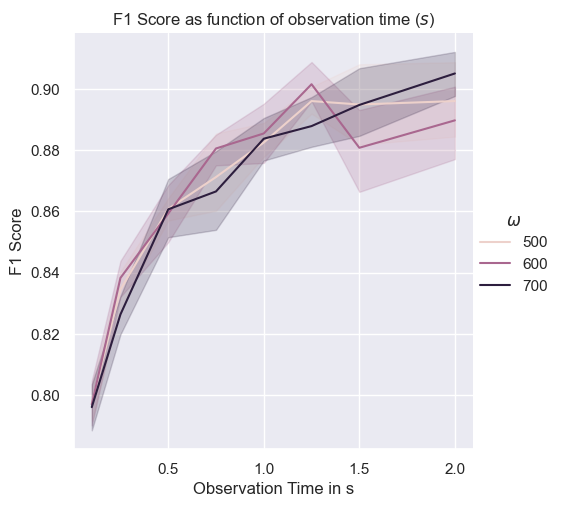

In [36]:
f1score = sns.relplot(
    data=fig,
    x = 'Time window' , y = 'F1 Score',hue = '$\omega$',
    markers = "o", kind = "line"
)
f1score.set(title = 'F1 Score as function of observation time ($s$)')
f1score.set_xlabels('Observation Time in s')
plt.show()
f1score.savefig('../fig/F1score.pdf',dpi=300)



Figure 3 : MAE alpha et D 

In [37]:
#The prediction on test set
Data = res
omegas = [500,600,700]
omegas_x = [200,225,250,275,300]
time_list = [0.1,0.25, 0.5, 0.75, 1.0, 1.25 , 1.50, 2.0]
fig = metrics.return_mae_fit_ml(Data, omegas,omegas_x,time_list,models)


/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_64115/2874988056.py:5: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  maealphavsfit = sns.relplot(


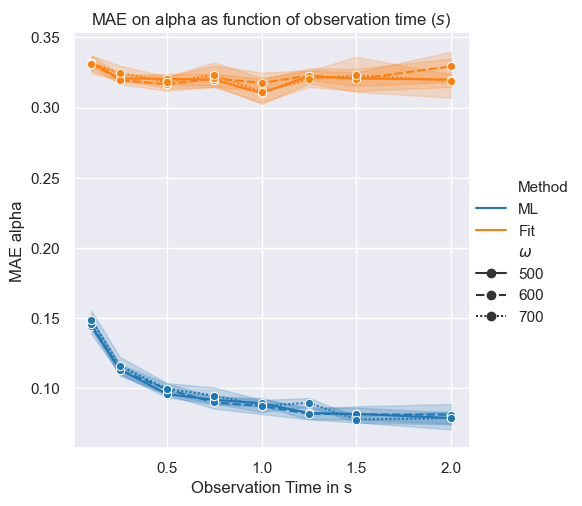

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_64115/2874988056.py:15: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  maeDvsfit = sns.relplot(


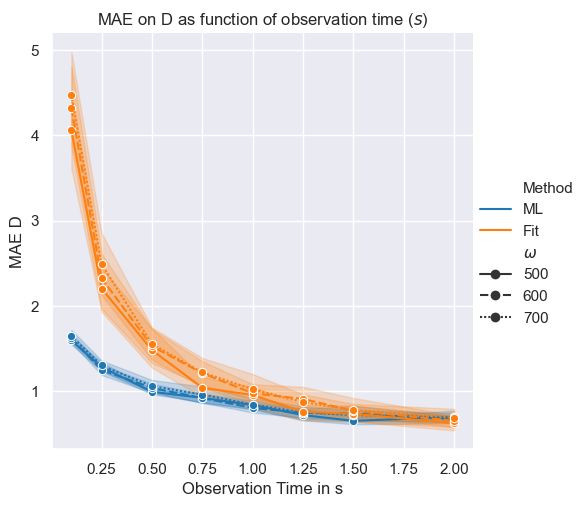

In [39]:

fig['$\omega$']=fig['omega']

sns.set_theme()
sns.set_palette(mypalette)
maealphavsfit = sns.relplot(
    data=fig,#.loc[(fig['omega_x']==300)&(fig['omega']==700),:],
    x = 'Time window' , y = 'MAE alpha',hue ='Method',style = '$\omega$',#  style = '$\omega_x$',
    markers = "o", kind = "line"
)
maealphavsfit.set(title = 'MAE on alpha as function of observation time ($s$)')
maealphavsfit.set_xlabels('Observation Time in s')
maealphavsfit.savefig('../fig/mae_alpha_compare.pdf')
plt.show()

maeDvsfit = sns.relplot(
    data=fig,
    x = 'Time window' , y = 'MAE D',hue ='Method',style = '$\omega$',#  style = '$\omega_x$',
    markers = "o", kind = "line"
)
maeDvsfit.set(title = 'MAE on D as function of observation time ($s$)')
maeDvsfit.set_xlabels('Observation Time in s')
maeDvsfit.savefig('../fig/mae_D_compare.pdf')
plt.show()

Figure 6 : Experimental Data

In [10]:
Module = joblib.load('../dat/model_trained.pk')

mypalette = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#7f7f7f','#bcbd22','#17becf']
palette2 = ['#719b78','#6a73a4','#bc8977']

#Path of the .ptu files
path = '../dat/Data_FCS_Nathan_40nm_Beads/Sample'

files = ['A','B','C','D','E']
glycerol = [48,31,23,12,6]
Res = []
omega = [522,522,522,522,522]
omega_x = [214,214,214,214,214]
for index,file in enumerate(files):
    #The module load the files and make predictions
    res_sample = Module.load_ptu(path+file,t_max_experiment=1,stride=0.05,omega=omega[index],omega_x=omega_x[index],t_max_window=0.5)
    res_sample['Glycerol'] = glycerol[index]
    Res.append(res_sample)

Res = pd.concat(Res)

Number of files =  9
Number of files =  30
Number of files =  30
Number of files =  30
Number of files =  29


KeyboardInterrupt: 

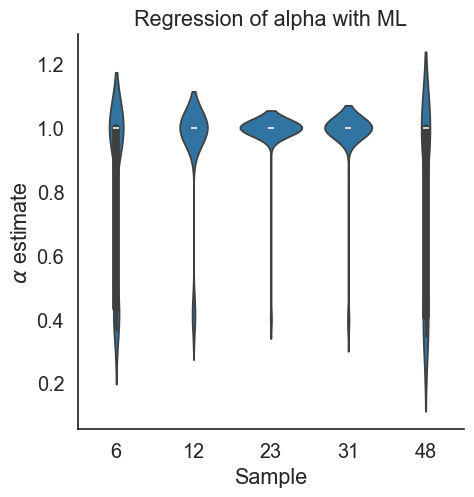

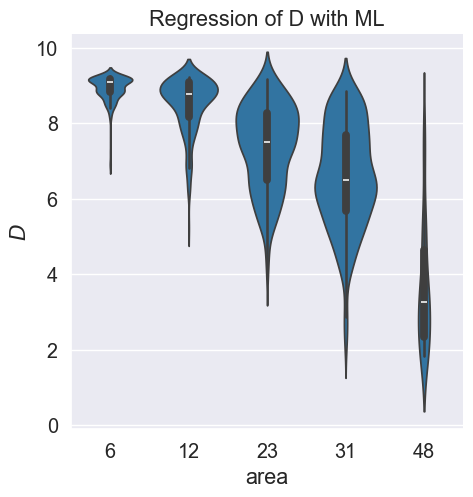

In [95]:
Data = Res
name_encoder = LabelEncoder() #initializing an object of class LabelEncoder
name_encoder.fit(Data['file name'])
Data['file name'] = name_encoder.transform(Data['file name'])



sns.set_theme(font_scale=1.3,style = 'white')
sns.set_palette([mypalette[2],mypalette[2],mypalette[2],mypalette[2]])
alphabead = sns.catplot( data=Data, kind="violin",
    x="Glycerol", y="alpha pred", color=mypalette[0])
alphabead.set(title ='Regression of alpha with ML')
alphabead.set_ylabels(chr(945))
alphabead.set(xlabel ='Sample',ylabel = r'$\alpha$ estimate')
alphabead.set(frame_on=True)
alphabead.savefig('../fig/beads_alpha_ml.pdf')
plt.show()

sns.set_palette([mypalette[2],mypalette[2],mypalette[2],mypalette[2]])
sns.set_theme()
Dbead = sns.catplot( data=Data.loc[Data['alpha pred']>=0.9], kind="violin",
    x="Glycerol", y="D pred", density_norm = 'count', color=mypalette[0])
Dbead.set(title = 'Regression of D with ML',xlabel='area')
Dbead.set_ylabels("$D$")
Dbead.savefig('../fig/beads_D_ml.pdf')
plt.show()


In [9]:
time_list = [0.5]

model_list = [ 'MB' ,'CTRW', 'FBM']
for gly in np.unique(Data['Glycerol']):
    for time in time_list:
        for model in model_list:
            #count occurence of each model predicted for each experiments (gly)
            idx = (Data['Glycerol']==gly) & (Data['Time window']==time) & (Data['Model pred']==model)
            Data.loc[idx,'Count']=len(Data.loc[idx,'Time window'])/len(Data.loc[(Data['Glycerol']==gly)& (Data['Time window']==time) ,'Time window'])

sns.set_theme(style="white",font_scale=1.3)
palette3 = ['#bc8977','#719b78','#6a73a4']
#Green = Bm, Brown = fBm, Blue = CTRW
sns.set_palette(palette3)
modelpred =  sns.catplot(
    data=Data
    , kind="bar",
    x="Glycerol", y="Count", hue="Model pred",
     palette=palette3, alpha=.6, height=6
)
modelpred.set(xlabel ='Sample',ylabel = 'ratio')
modelpred.set(title = "Diffusion Model of beads depending the concentration of glycerol")
modelpred.savefig('../fig/beads_model.pdf')
plt.show()

NameError: name 'Data' is not defined

In [ ]:
Data = metrics.normalize_data4plot(Res)

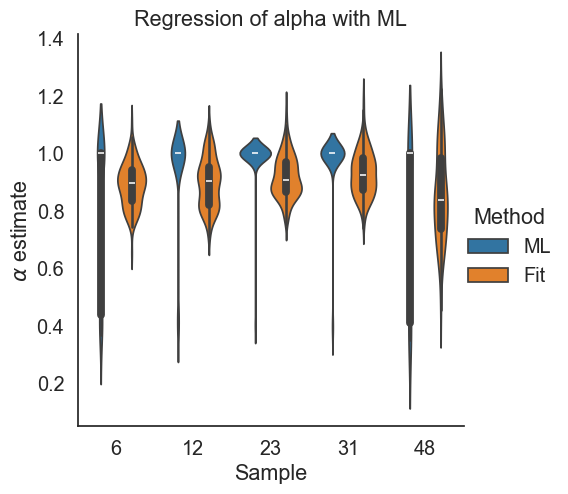

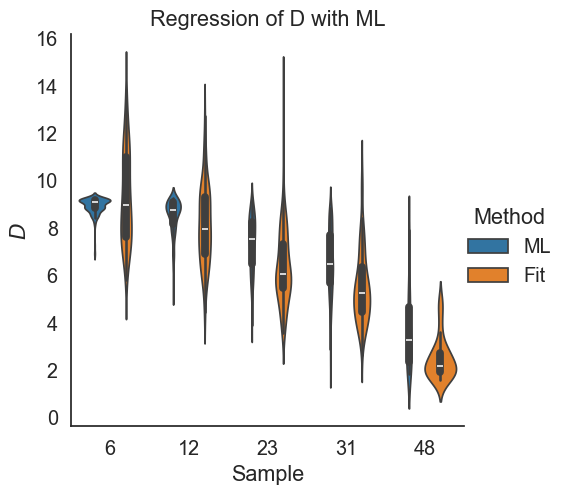

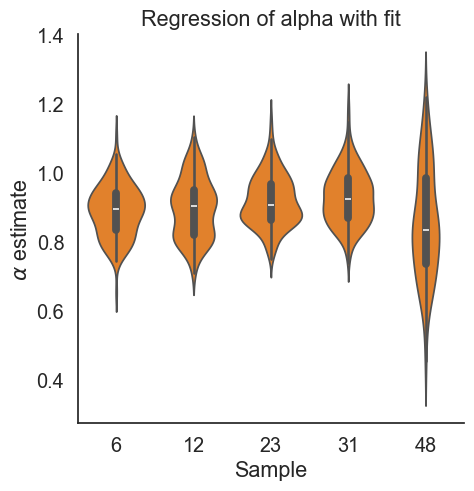

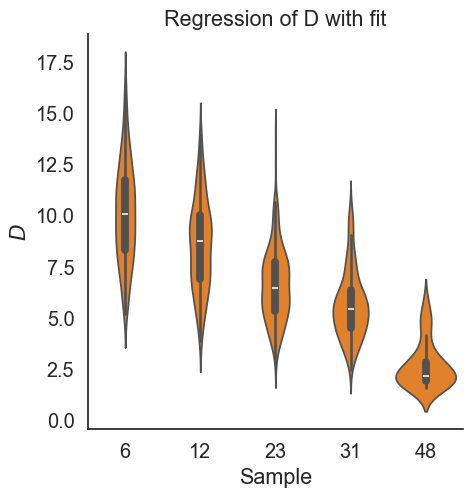

In [99]:
sns.set_theme(font_scale=1.3,style = 'white')
sns.set_palette(mypalette)

alphabeadsvsfit = sns.catplot( data=Data.loc[(Data['alpha']!=2),:], kind="violin",
    x="Glycerol", y='alpha',hue = 'Method',inner = 'box')
alphabeadsvsfit.set(title ='Regression of alpha with ML')
alphabeadsvsfit.set_ylabels(chr(945))
alphabeadsvsfit.set(xlabel ='Sample',ylabel = r'$\alpha$ estimate')
alphabeadsvsfit.set(frame_on=True)
alphabeadsvsfit.savefig('../fig/beads_alpha_compare.pdf')
plt.show()


Dbeadsvsfit = sns.catplot( data=Data.loc[(Data['alpha']>=0.9)&(Data['alpha']!=2),:], kind="violin",
    x="Glycerol", y="D",hue='Method',inner = 'box',density_norm = 'area')
Dbeadsvsfit.set(title = 'Regression of D with ML',xlabel='Sample')
Dbeadsvsfit.set_ylabels("$D$")
Dbeadsvsfit.savefig('../fig/beads_D_compare.pdf')
plt.show()


alphabeadsfit = sns.catplot( data=Data.loc[(Data['alpha']!=2)&(Data['Method']=='Fit')], kind="violin",
    x="Glycerol", y="alpha",color = mypalette[1])
alphabeadsfit.set(title ='Regression of alpha with fit')
alphabeadsfit.set_ylabels(chr(945))
alphabeadsfit.set(xlabel ='Sample',ylabel = r'$\alpha$ estimate')
alphabeadsfit.set(frame_on=True)
alphabeadsfit.savefig('../fig/beads_alpha_fit.pdf')
plt.show()


Dbeadsfit = sns.catplot( data=Data.loc[(Data['alpha']>=0.9)&(Data['Method']=='Fit')], kind="violin",
    x="Glycerol", y="D",color = mypalette[1])
Dbeadsfit.set(title = 'Regression of D with fit',xlabel='Sample')
Dbeadsfit.set_ylabels("$D$")
Dbeadsfit.savefig('../fig/beads_D_fit.pdf')
plt.show()

Experimental data : overview

In [100]:
files = ['A','B','C','D','E','F','Control']
Dtheo = [ 2.35,4.85,6.37,8.71,10.4,9.91,12]
glycerol = [48,31,23,12,6]

table = metrics.create_recap_table(Data,files,Dtheo,glycerol)
table.write_image("../fig/table_recap.pdf", scale=2)

print(table)

   Expe  D theoric  Mean D ML  Mean D fit  Mean alpha ML  Mean alpha fit
0    48       2.35      2.842       3.095          0.767           0.855
1    31       4.85      6.463       5.586          0.980           0.931
2    23       6.37      7.326       6.453          0.988           0.919
3    12       8.71      8.181       8.158          0.943           0.897
4     6      10.40      7.968       9.782          0.832           0.890


Figure 7 : Latent space of classifier on beads through time

Index(['window number', 'file name', 'omega_x', 'omega', 'Time window',
       'stride', 'G', 'D fit', 'alpha fit', 'alpha pred', 'D pred',
       'Model pred n#', 'Proba CTRW', 'Proba FBM', 'Proba MB', 'Model pred',
       'Glycerol', 'Count', 'nx', 'ny'],
      dtype='object')


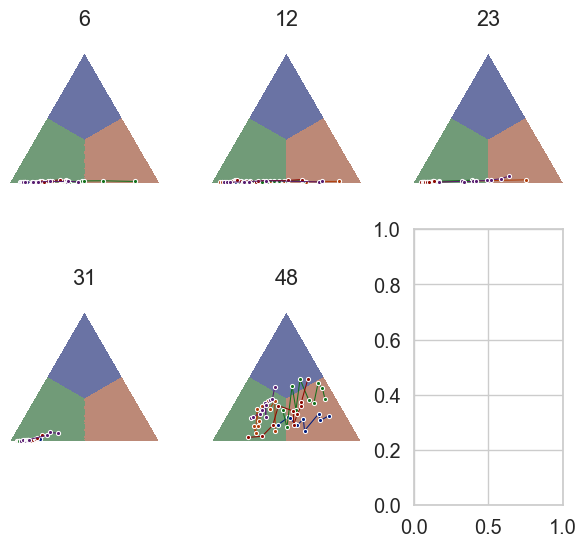

In [109]:
data_beads = Res
fig = metrics.plot_ternary(data_beads)
fig.savefig('../fig/beads_model_pred_traj.png',dpi=600)
plt.show()

Figure 5 : Dynamical Analysis

In [3]:
data_alpha = pd.read_pickle('../dat/df_A_last_0').rename(columns={"omega_x": "omega_x", "omega": "omega","Tmax":"Time window"})
#The stride is about 0.05 s
data_alpha['Time'] = data_alpha['window number']*0.05
print("File list ", np.unique(data_alpha['file name'].to_numpy()))
data_alpha = Module.predict_dataframe(data_alpha)

data_D = pd.read_pickle('../dat/df_D_last_0').rename(columns={"omega_x": "omega_x", "omega": "omega","Tmax":"Time window"})
#The stride is about 0.05 s
data_D['Time'] = data_D['window number']*0.05
print("File list ", np.unique(data_D['file name'].to_numpy()))
data_D = Module.predict_dataframe(data_D)
sns.set_theme(font_scale=1.3,style = 'white')

File list  ['10' '11' '12' '20' '21' '30' '31' '41']
File list  ['17' '24' '42']


In [3]:
Module.load_csv_evo('/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/Datas/FCS_AVOL',10,'avol',1)
data_alpha = pd.read_pickle('avol/prediction0.pk')

Number of files =  135
Starting subprocess n°1 sur 1
At time (in hour) :  3.0464596218532988e-09
Number of empty files :  0
Number of empty files :  0
Number of empty files :  0
Number of empty files :  0
Number of empty files :  0
Number of empty files :  0
Number of empty files :  0
Number of empty files :  0


/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:180: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:180: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


Time max :  8.5
Start :  0.00155591 End :  9.01998


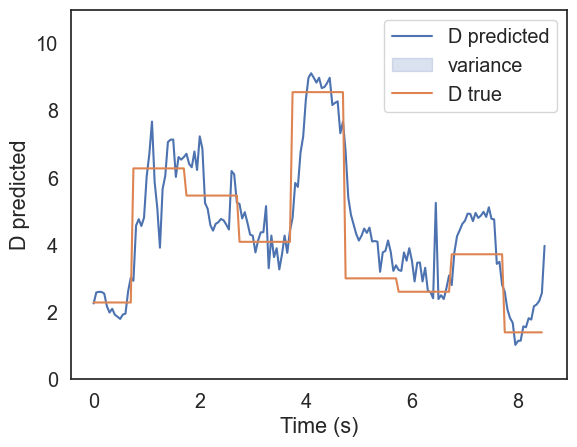

In [4]:
file = '42'
idx = (data_D['file name']==file)&(data_D['Dynamic']=='D')&(data_D['Time']<=8.5)
dat = data_D.loc[idx,:]
dat.reset_index(inplace=True,drop=True)
D = np.repeat(dat['val'][1],20).T

kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size
#D = np.convolve(D, kernel, mode='same')[5:-25]
D = D[5:-25]


print("Time max : ",dat.Time.max())
print("Start : ",dat.Start.iloc[0],"End : ",dat.End.iloc[0])
fig = plt.figure()
fig.ax = sns.lineplot(data=dat,x = 'Time',y='D pred')
fig.ax.plot(np.arange(0,8.5,5e-2),D)
fig.ax.legend((r'D predicted','variance',r'D true','variance'))
fig.ax.set(ylim= (0,11),ylabel=r"D predicted",xlabel=r"Time (s)")
fig.savefig('../fig/evol_D.pdf')
plt.show()


Time max :  8.5
Start :  0.0 End :  9.99997


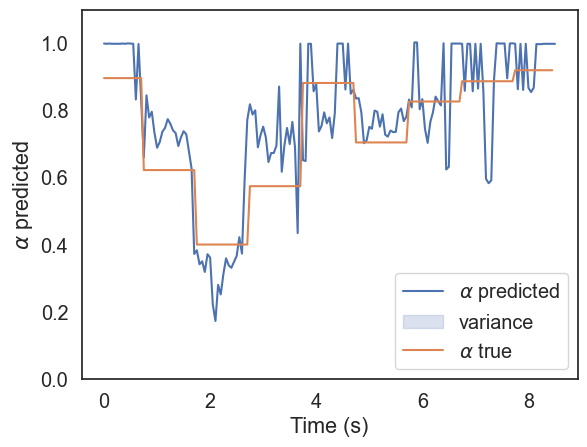

In [5]:
file = '21'
#for file in np.unique(data_alpha['file name'])[16:19]:
idx = (data_alpha['file name']==file)&(data_alpha['Dynamic']=='A')&(data_alpha['omega_x']==250)&(data_alpha['omega']==500)&(data_alpha['Time']<=8.5)
dat = data_alpha.loc[idx,:]
dat.reset_index(inplace=True,drop=True)

alpha = np.repeat(dat['val'][0],20).T
kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size
#alpha = np.convolve(alpha, kernel, mode='same')[5:-25]#[5:-6]
alpha = alpha[5:-25]

print("Time max : ",dat.Time.max())
print("Start : ",dat.Start.iloc[0],"End : ",dat.End.iloc[0])
fig = plt.figure()
fig.ax = sns.lineplot(data=dat,x = 'Time',y='alpha pred')
fig.ax.plot(np.arange(0,8.5,5e-2),alpha)#fig.ax.plot(np.arange(0,10,5e-2)[:-11],alpha)
fig.ax.legend((r'$\alpha$ predicted','variance',r'$\alpha$ true','variance'))
fig.ax.set(ylim= (0,1.1),ylabel=r"$\alpha$ predicted",xlabel=r"Time (s)")
fig.savefig('../fig/evol_alpha.pdf')
plt.show()


In [10]:
data_D = pd.read_pickle('../dat/data_D_evol.pk')
data_alpha = pd.read_pickle('../dat/data_alpha_evol.pk')

data_D = Module.predict_dataframe(data_D)
data_alpha = Module.predict_dataframe(data_alpha)

/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:178: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:178: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:178: RuntimeWarning: divide by zero encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))
/Users/nathanquiblier/Codes_Inria_Nathan/Projectscode/MLFCS/src/module.py:178: RuntimeWarning: invalid value encountered in divide
  autoco = np.divide(autoco,autoco[:,:5].mean(axis=1).reshape(autoco.shape[0],1))


In [11]:
time_list = np.unique(data_D['Time window'])
omegas = [500,600,700]
omegas_x = [200,225,250,275,300]
fig = metrics.compute_dynamic_mae(data_D,data_alpha,time_list,omegas,omegas_x)

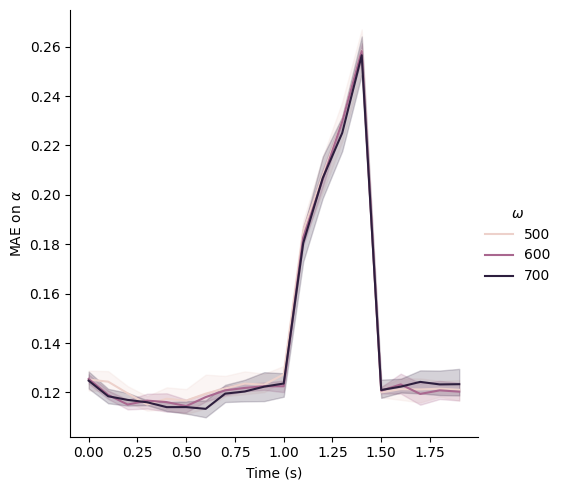

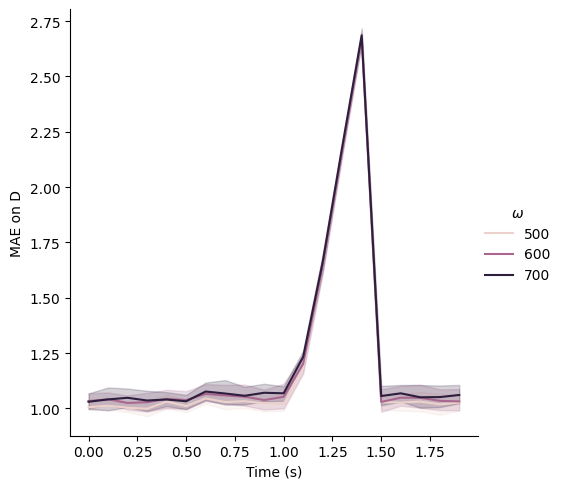

In [12]:
data = res
stride = 0.1
data['Time'] = data['window number']*0.1
alphaevol = sns.relplot(data=data.loc[res['Dynamic']=='A'],x='Time',y='MAE',hue = '$\omega$',
    markers = "o",kind='line')
#alphaevol.legend((r'$\alpha$ predicted','variance',r'$\alpha$ true','variance'))
alphaevol.set(ylabel=r"MAE on $\alpha$",xlabel=r"Time (s)")
alphaevol.savefig('../fig/mae_evol_alpha.pdf')
plt.show()

Devol = sns.relplot(data=data.loc[res['Dynamic']=='D'],x='Time',y='MAE',hue = '$\omega$',
    markers = "o",kind='line')
#Devol.legend((r'D predicted','variance',r'D true','variance'))
Devol.set(ylabel=r"MAE on D",xlabel=r"Time (s)")
Devol.savefig('../fig/mae_evol_D.pdf')
plt.show()

Figure 4 : Performance as function of illumination

In [8]:
#Load already computed prediction on test illu set
datasets = pd.read_pickle('../dat/test_illu.pk').drop(['G'],axis=1)
#Load dataset on illumination and make pred (it's quite long)
#datasets = pd.read_pickle('../dat/test_illu.pk').drop(['alpha pred','D pred','Model pred'],axis=1)
#datasets = Module.predict_dataframe(datasets)

In [9]:

time_list = [ 0.25, 0.5, 0.75, 1.0,  1.5]
res = metrics.metrics_fn_illu(datasets,time_list)


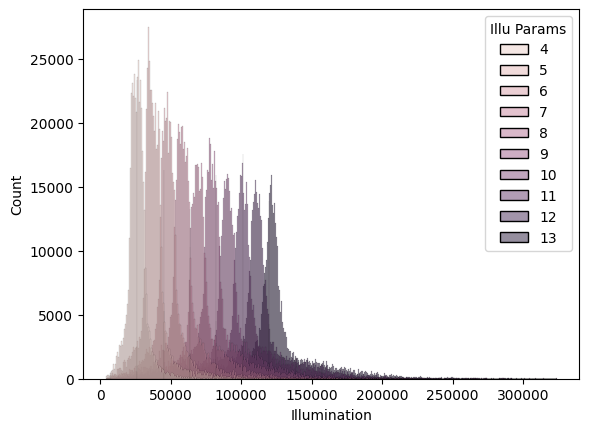

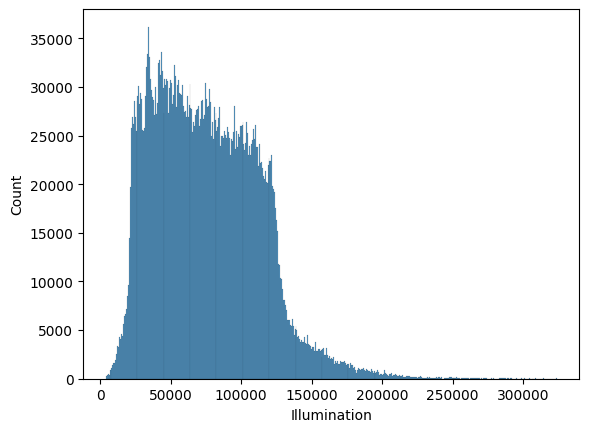

In [10]:
#datasets = res_illu
illu_distrib = plt.figure()
illu_distrib.ax = sns.histplot(data=datasets,x='Illumination',hue='Illu Params')
illu_distrib.savefig('../fig/illu_distrib.pdf')
plt.show()

illu_distrib = plt.figure()
illu_distrib.ax = sns.histplot(data=datasets,x='Illumination')
illu_distrib.savefig('../fig/illu_distrib2.pdf')
plt.show()

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_68225/2932256499.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  mae_illu_param.ax = sns.barplot(data = res,x='Time window',y='MAE',hue='Illu Params',palette=sns.color_palette("viridis"))


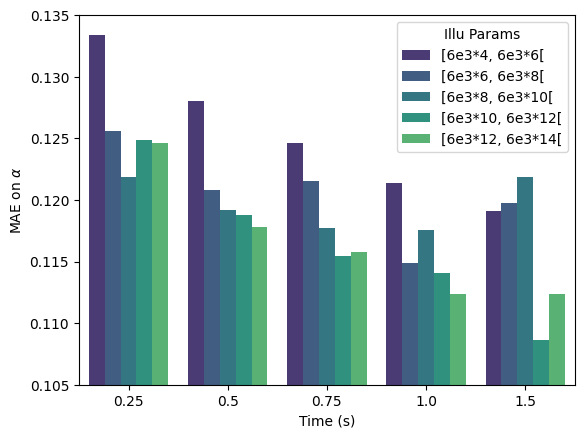

/var/folders/85/b8htq4k55p3ckpnn4zl_2jyr0000gn/T/ipykernel_68225/2932256499.py:10: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  f1_illu_param.ax = sns.barplot(data = res,x='Time window',y='F1',hue='Illu Params',palette=sns.color_palette("viridis"))


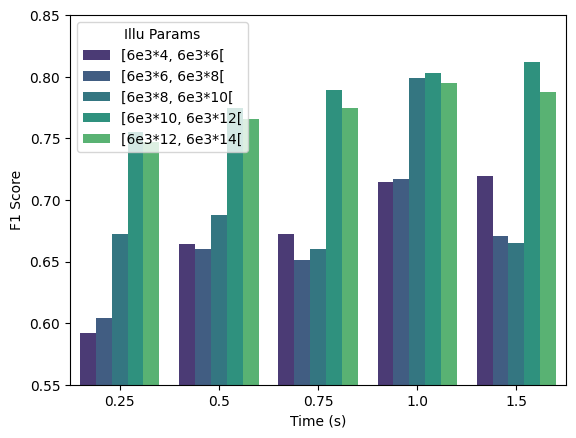

In [5]:

xlegend = ['[6e3*4 , 6e3*6[' , '[6e3*6 , 6e3*8[', '[6e3*8 , 6e3*10[' ,  '[6e3*10 , 6e3*12[',  '[6e3*12 , 6e3*14[']

mae_illu_param = plt.figure()
mae_illu_param.ax = sns.barplot(data = res,x='Time window',y='MAE',hue='Illu Params',palette=sns.color_palette("viridis"))
mae_illu_param.ax.set(ylabel=r"MAE on $\alpha$",xlabel=r"Time (s)",ylim=(0.105,0.135))
mae_illu_param.savefig('../fig/mae_illu_param.pdf')
plt.show()

f1_illu_param = plt.figure()
f1_illu_param.ax = sns.barplot(data = res,x='Time window',y='F1',hue='Illu Params',palette=sns.color_palette("viridis"))
f1_illu_param.ax.set(ylabel=r"F1 Score",xlabel=r"Time (s)",ylim=(0.55,0.85))
f1_illu_param.savefig('../fig/f1_illu_param.pdf')
plt.show()

